# Model train and video capture

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
datalabels = pd.read_csv('labellised_images.csv', sep=',')
print(datalabels.columns)
print(datalabels.shape)

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46',
       '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '60', '61', '62', 'classe'],
      dtype='object')
(794, 65)


In [4]:
datalabels = datalabels.drop(["Unnamed: 0"], axis=1)
datalabels.shape

(794, 64)

In [5]:
x = datalabels.iloc[:,:-1].values
y = datalabels['classe'].values

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=21)

In [7]:
# check if y_train and y_test have egals uniques values
print(len(np.unique(y_train)))
print(len(np.unique(y_test)))

26
26


In [8]:
from sklearn import preprocessing
import tensorflow as tf

In [9]:
le = preprocessing.LabelEncoder()

In [10]:
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [11]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(63,activation='relu',input_shape=(63,)))
model.add(tf.keras.layers.Dense(50,activation='relu'))
model.add(tf.keras.layers.Dense(40,activation='relu'))
model.add(tf.keras.layers.Dense(30,activation='relu'))

model.add(tf.keras.layers.Dense(26,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 63)                4032      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3200      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                2040      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_4 (Dense)              (None, 26)                806       
Total params: 11,308
Trainable params: 11,308
Non-trainable params: 0
_________________________________________________________________


In [12]:
print(x_train.shape)
print(y_train.shape)

(555, 63)
(555,)


In [13]:
# training
history = model.fit(
	x_train, y_train,
	validation_data=(x_test, y_test),
	batch_size=4,
	epochs=300,
  shuffle=True,
	verbose=1)

00
139/139 [==============================] - 0s 3ms/step - loss: 0.3505 - accuracy: 0.8726 - val_loss: 2.8666 - val_accuracy: 0.5732
Epoch 164/300
139/139 [==============================] - 1s 4ms/step - loss: 0.4561 - accuracy: 0.8380 - val_loss: 2.5281 - val_accuracy: 0.6904
Epoch 165/300
139/139 [==============================] - 1s 4ms/step - loss: 0.3028 - accuracy: 0.9002 - val_loss: 2.5388 - val_accuracy: 0.6611
Epoch 166/300
139/139 [==============================] - 0s 4ms/step - loss: 0.3950 - accuracy: 0.8631 - val_loss: 2.6169 - val_accuracy: 0.6527
Epoch 167/300
139/139 [==============================] - 1s 4ms/step - loss: 0.3042 - accuracy: 0.8960 - val_loss: 2.8362 - val_accuracy: 0.5858
Epoch 168/300
139/139 [==============================] - 1s 4ms/step - loss: 0.3767 - accuracy: 0.8575 - val_loss: 2.5380 - val_accuracy: 0.6695
Epoch 169/300
139/139 [==============================] - 1s 6ms/step - loss: 0.3340 - accuracy: 0.8815 - val_loss: 2.6452 - val_accuracy: 0.6

In [14]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt 


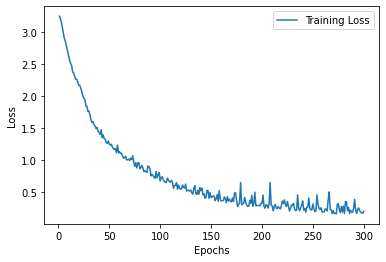

In [15]:
# training loss plot
y_pred=model.predict(x_test)
prob=[]
for pred in y_pred:
    prob.append(np.argmax(pred))
y_pred=prob  
score=metrics.accuracy_score(y_test,y_pred)

loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

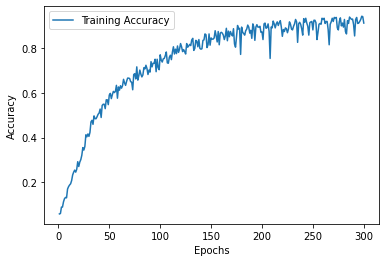

In [16]:
# training accuracy plot
loss_values = history.history['accuracy']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
# accuracy
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

8/8 - 0s - loss: 3.4955 - accuracy: 0.6151


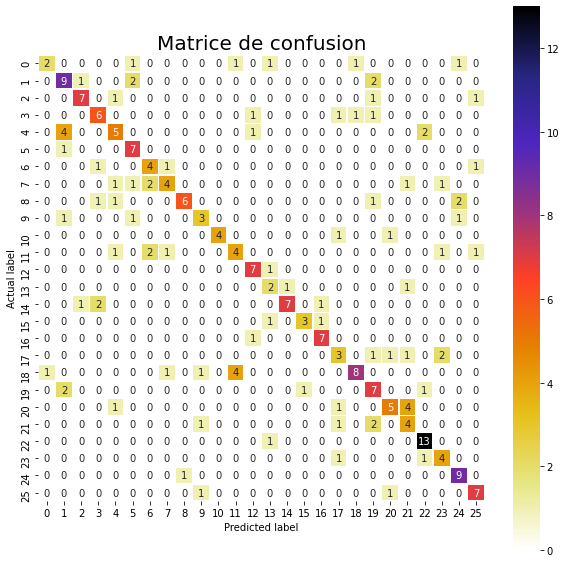

In [18]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'CMRmap_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Matrice de confusion", size = 20)
plt.show()

In [19]:
# model.save('sign_model')

In [20]:
# from tensorflow.keras.models import load_model
# sign_model = load_model('sign_model')

## Video capture with Mediapipe

In [21]:
import mediapipe as mp
import cv2

In [22]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [28]:
# create video capture, empty list for record letter and empty sentence
cap = cv2.VideoCapture(0)
megaList = []
sentence = ""

# text param for the sentence and letter
org = (250, 400)
org_letter = (450, 250)
color = (255,0,0)
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 2


# initiate holistic model
with mp_holistic.Holistic(min_detection_confidence=0.6, min_tracking_confidence=0.6) as holistic:

    while cap.isOpened():
        ret, frame = cap.read()

        # Recolor Feed for Mediapipe:
        image = cv2.cvtColor(cv2.flip(frame, 1), cv2.COLOR_BGR2RGB)
        # Make Detections
        results = holistic.process(image)

        if results.pose_landmarks:
      
            hand_landmarks= results.right_hand_landmarks
            prev=""
            liste=[]
            for letter in (str(hand_landmarks)):
                try:
                    number=int(letter)
                    prev+=letter
                except:
                    if letter=="-" or letter =='.' or letter =='e':
                        prev+=letter
                    elif prev != "" and len(prev)>2:
                        liste.append(float(prev))
                        prev=""

        if len(liste)>0:
            var=(le.inverse_transform([np.argmax(model.predict([liste]))]))
            megaList.append(var)

            # write predict letter 
            cv2.putText(image,var[0], org_letter, font, fontScale, color, thickness)

            # after 15 egal values (letter) record in megalist, add most iterate letter in sentence and refresh megalist 
            if megaList.count(var)>15:
                sentence+=var[0]
                megaList=[]

        # write sentence
        cv2.putText(image, sentence, org, font, fontScale, color, thickness)


        # right hand
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

        # recolor Feed for cv2
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        # show video 
        cv2.imshow('Hand Model Detections', image)

        # clic on space key to space
        if cv2.waitKey(1) == 32:
            sentence += " "

        # clic on a key to delete last letter in sentence
        if cv2.waitKey(1) & 0xFF == ord('a'):
            sentence = sentence[:-1]

        # clic on q key to close video capture
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()